## I. Initialise

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import cv2
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import random

from IPython.display import HTML
from PIL import Image

from loader import DataLoader
from models.spectral_model import get_inferred_image
from registration.first_registration import Align
from models.ransacflow import register_image

Loaded pretrained model from /Users/farhanoktavian/imperial/thesis/sandbox/final_regist/weights/MegaDepth_Theta1_Eta001_Grad1_0.774.pth


### Constants

In [2]:
DATA_DIR = "/Users/farhanoktavian/imperial/thesis/sandbox/dataset/raw"
METADATA_DIR = "/Users/farhanoktavian/imperial/thesis/sandbox/dataset/data.h5"

## II. Load Data

### Initialise Data Loader

In [3]:
run_loader = DataLoader(DATA_DIR, METADATA_DIR)

### Get Run

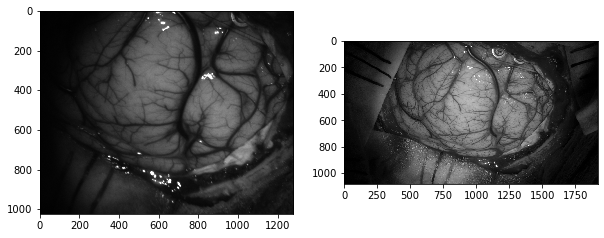

In [4]:
# Get run randomly
sample = random.choice(run_loader.samples)
run = random.choice(sample.runs)

run_coll = random.randint(0, run.collection_count - 1)
SI = run.get_spectral_image(wavelength=600, collection_idx=run_coll)
MI = run.get_label_image(channel="bw")

# Plot SI and MI side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(SI, cmap="gray")
ax[1].imshow(MI, cmap="gray")
plt.show()

## III. Register Run

### Infer RGB targets

Image blue done!
Image green done!
Image red done!


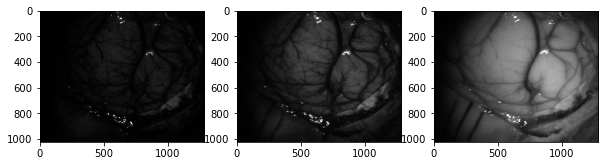

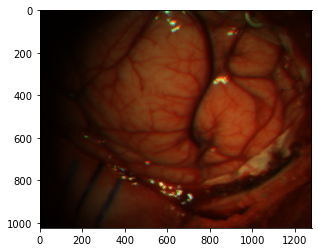

In [5]:
tgt_b = run.get_spectral_images(collection_idx=0, channel="b")
tgt_b = get_inferred_image(tgt_b)
print("Image blue done!")

tgt_g = run.get_spectral_images(collection_idx=0, channel="g")
tgt_g = get_inferred_image(tgt_g)
print("Image green done!")

tgt_r = run.get_spectral_images(collection_idx=0, channel="r")
tgt_r = get_inferred_image(tgt_r)
print("Image red done!")


fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].imshow(tgt_b, cmap="gray")
ax[1].imshow(tgt_g, cmap="gray")
ax[2].imshow(tgt_r, cmap="gray")
plt.show()

tgt_rgb = cv2.merge((tgt_r, tgt_g, tgt_b))
plt.imshow(tgt_rgb)

### Register stack to targets

Stack blue done!
Stack green done!
Stack red done!


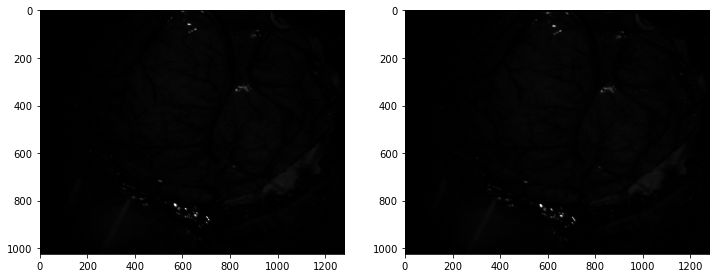

In [6]:
stack_b = run.get_spectral_images(collection_idx=0, channel="b")
reg_stack_b = []
for img in stack_b:
    align = Align(img, tgt_b, mode="sift", threshold=1)
    reg_img, merg_img = align.align_image()
    # reg_img = register_image(Image.fromarray(cv2.merge((img, img, img))), Image.fromarray(cv2.merge((tgt_b, tgt_b, tgt_b))))
    # reg_img = cv2.split(reg_img)[0]
    reg_stack_b.append(reg_img)
print("Stack blue done!")

stack_g = run.get_spectral_images(collection_idx=0, channel="g")
reg_stack_g = []
for img in stack_g:
    align = Align(img, tgt_g, mode="sift", threshold=1)
    reg_img, merg_img = align.align_image()
    # reg_img = register_image(Image.fromarray(cv2.merge((img, img, img))), Image.fromarray(cv2.merge((tgt_g, tgt_g, tgt_g))))
    # reg_img = cv2.split(reg_img)[0]                                                                           
    reg_stack_g.append(reg_img)
print("Stack green done!")

stack_r = run.get_spectral_images(collection_idx=0, channel="r")
reg_stack_r = []
for img in stack_r:
    align = Align(img, tgt_r, mode="sift", threshold=1)
    reg_img, merg_img = align.align_image()
    # reg_img = register_image(Image.fromarray(cv2.merge((img, img, img))), Image.fromarray(cv2.merge((tgt_r, tgt_r, tgt_r))))
    # reg_img = cv2.split(reg_img)[0]
    reg_stack_r.append(reg_img)
print("Stack red done!")

raw_images = stack_b + stack_g + stack_r
reg_images = reg_stack_b + reg_stack_g + reg_stack_r

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ims = []

# axes[0].imshow(raw_images[0], cmap="gray", vmin=0, vmax=255)
# axes[1].imshow(reg_images[0], cmap="gray", vmin=0, vmax=255)

def animate(i):
    axes[0].imshow(raw_images[i], cmap="gray", vmin=0, vmax=255, animated=True)
    axes[1].imshow(reg_images[i], cmap="gray", vmin=0, vmax=255, animated=True)

ani = animation.FuncAnimation(fig, animate, interval=75, blit=False, frames=len(raw_images))
HTML(ani.to_html5_video())

### Register microscope to targets

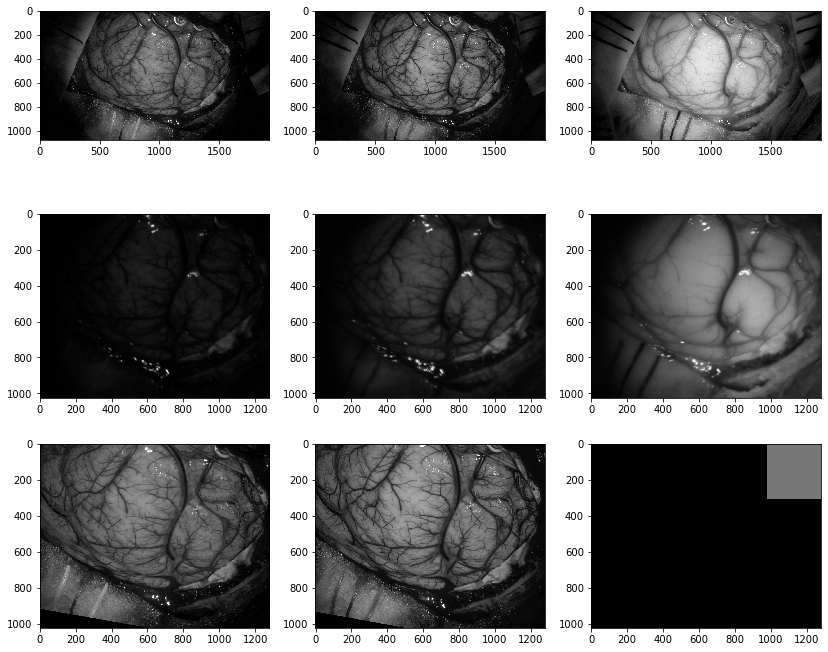

In [7]:
mi_b = run.get_label_image(channel="b")
mi_g = run.get_label_image(channel="g")
mi_r = run.get_label_image(channel="r")

align = Align(mi_b, tgt_b, mode="sift", threshold=1)
reg_mi_b, merg_mi_b = align.align_image()

align = Align(mi_g, tgt_g, mode="sift", threshold=1)
reg_mi_g, merg_mi_g = align.align_image()

align = Align(mi_r, tgt_r, mode="sift", threshold=1)
reg_mi_r, merg_mi_r = align.align_image()

fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes[0, 0].imshow(mi_b, cmap="gray")
axes[0, 1].imshow(mi_g, cmap="gray")
axes[0, 2].imshow(mi_r, cmap="gray")
axes[1, 0].imshow(tgt_b, cmap="gray")
axes[1, 1].imshow(tgt_g, cmap="gray")
axes[1, 2].imshow(tgt_r, cmap="gray")
axes[2, 0].imshow(reg_mi_b, cmap="gray")
axes[2, 1].imshow(reg_mi_g, cmap="gray")
axes[2, 2].imshow(reg_mi_r, cmap="gray")

[1.2, 1.1333333333333333, 1.0666666666666667, 1.0, 0.9444444444444444, 0.888888888888889, 0.8333333333333334]


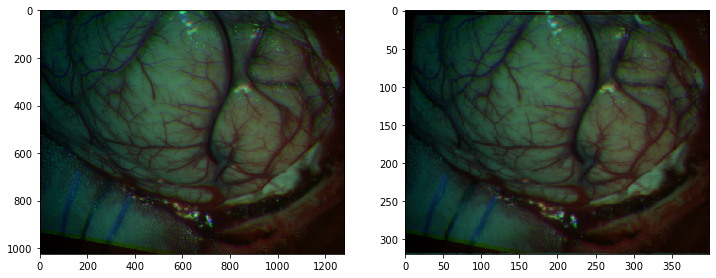

In [8]:
reg_mi_rgb = cv2.merge((reg_mi_r, reg_mi_g, reg_mi_b))
tgt_rgb = cv2.merge((tgt_r, tgt_g, tgt_b))

fine_reg_mi_rgb = register_image(Image.fromarray(reg_mi_rgb), Image.fromarray(tgt_rgb))

# merge image
merge_before = cv2.addWeighted(reg_mi_rgb, 0.5, tgt_rgb, 0.5, 0)
h, w = fine_reg_mi_rgb.shape[:2]
merge_after = cv2.addWeighted(fine_reg_mi_rgb, 0.5, cv2.resize(tgt_rgb, (w, h)), 0.5, 0)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(merge_before)
axes[1].imshow(merge_after)
plt.show()